In [1]:
# %matplotlib widget
%matplotlib inline

import os
import numpy as np
import matplotlib.pylab as plt
from pylab import rcParams
rcParams['figure.figsize'] = 13, 8
import pandas as pd
import random
import colorsys

In [2]:
def random_colors(N, bright=True):
    """
    Generate random colors.
    To get visually distinct colors, generate them in HSV space then
    convert to RGB.
    """
    brightness = 1.0 if bright else 0.7
    hsv = [(i / N, 1, brightness) for i in range(N)]
    colors = list(map(lambda c: colorsys.hsv_to_rgb(*c), hsv))
    random.shuffle(colors)
    return colors

In [3]:
def plot_graphs(exp_list, ytype='acc', plot_type='test'):
    """
    Args:
        ytype: 'acc', 'loss'
        plot_type: 'train', 'test', 'all'
    """
    fig = plt.figure(figsize=(20, 10))
    colors = random_colors(len(exp_list), bright=False)
    legends =[]
    for i, exp in enumerate(exp_list):
        legends.append(exp)
        with open(os.path.join('results', exp, 'log.txt'), 'r') as f:
            lines = f.readlines()
        steps, tr_loss, tr_acc, te_loss, te_acc = [], [], [], [], []

        for line in lines:
            try:
                line = line.replace('\n','')
                line_split = line.split(' ')
                if len(line_split) == 5:
                    [s, tr_ls, tr_ac, te_ls, te_ac] = line_split
                    steps.append(float(s))
                    tr_loss.append(float(tr_ls))
                    tr_acc.append(float(tr_ac))
                    te_loss.append(float(te_ls))
                    te_acc.append(float(te_ac))
            except:
                pass
        if ytype == 'acc':
            views = {'train':tr_acc, 'test':te_acc}
        elif ytype == 'loss':
            views = {'train':tr_loss, 'test':te_loss}
        view = views[plot_type]
        if len(steps) != len(view):
            continue
        
        plt.plot(steps, view, '-+', color=colors[i])
        # acc -> True
        flag = (view[0] - view[-1]) < 0
        if flag:
            m_index = np.argmax(view)
            plt.annotate('{:.5f}'.format(np.max(view)), 
                         xy=(steps[m_index], view[m_index]-0.05), color=colors[i])
        else:
            m_index = np.argmin(view)
            plt.annotate('{:.5f}'.format(np.min(view)), 
                         xy=(steps[m_index], view[m_index]+0.05), color=colors[i])
        print('{}: {:.5f}'.format(exp, view[m_index]))

    plt.legend(legends)
    plt.grid()
    # plt.ylim([0.4, 1])
    # plt.yticks(np.arange(0.4,1,0.1))
    plt.xlabel('epi')
    plt.ylabel('value')
    # plt.xlim([0,50000])
    plt.show()

In [5]:
exp_list = [ x  for x in os.listdir('./results') if not '.' in x]
exp_list.sort()

# exp_list.pop(0)
# exp_list.pop(0)
exp_list = [folder for folder in exp_list if 'res' in folder]
print(exp_list)

['convex1_res18', 'convex2_res18', 'proto1_res18', 'proto2_res18']


In [7]:
exp_list = ['covex1', 'proto1']

convex1_res18: 0.61480
convex2_res18: 0.60560
proto1_res18: 0.61160
proto2_res18: 0.60000


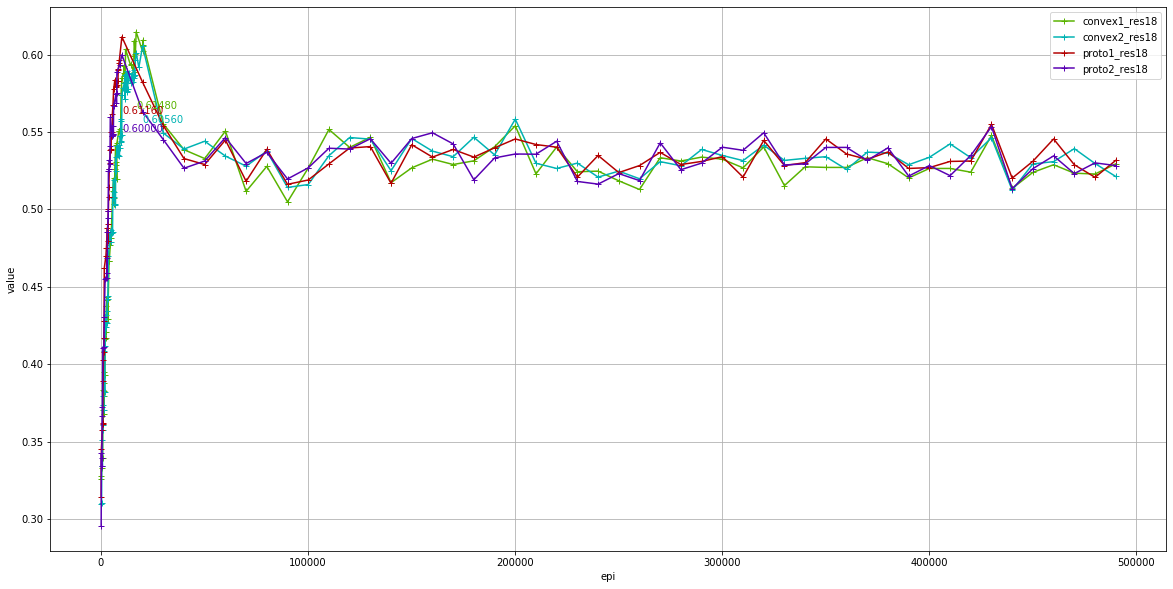

In [10]:
plot_graphs(exp_list, ytype='acc', plot_type='test')

In [19]:
exp_list = ['covex1']
ytype='acc'
plot_type='train'

100
200
300
400
500
600
800
900
1000
1100
1200
1300
1400
1600
2000
2700
2800
3100
3200
3300
3400
3600
3700
4000
4300
4500
4800
4900
5000
5500
5700
5800
5900
7200
7300
7400
7500
7700
8100
8300
8800
9000
9100
9500
9600
9800
9900
10100
10300
10500
10600
10700
11000
11100
11200
11300
11500
16100
16300
16400
16600
16800
17000
18000
18300
18400
18500
18600
19000
19600
20100
20300
20400
22400
23000
23100
23300
23400
30000
30100
30200
30400
30500
30800
30900
33200
33300
33400
34300
36400
36500
38200
39400
40100
50100
60100
62700
70100
73500
75600
80100
86200
90000
90100
91000
98100
100100
101700
110100
120100
130100
140100
150100


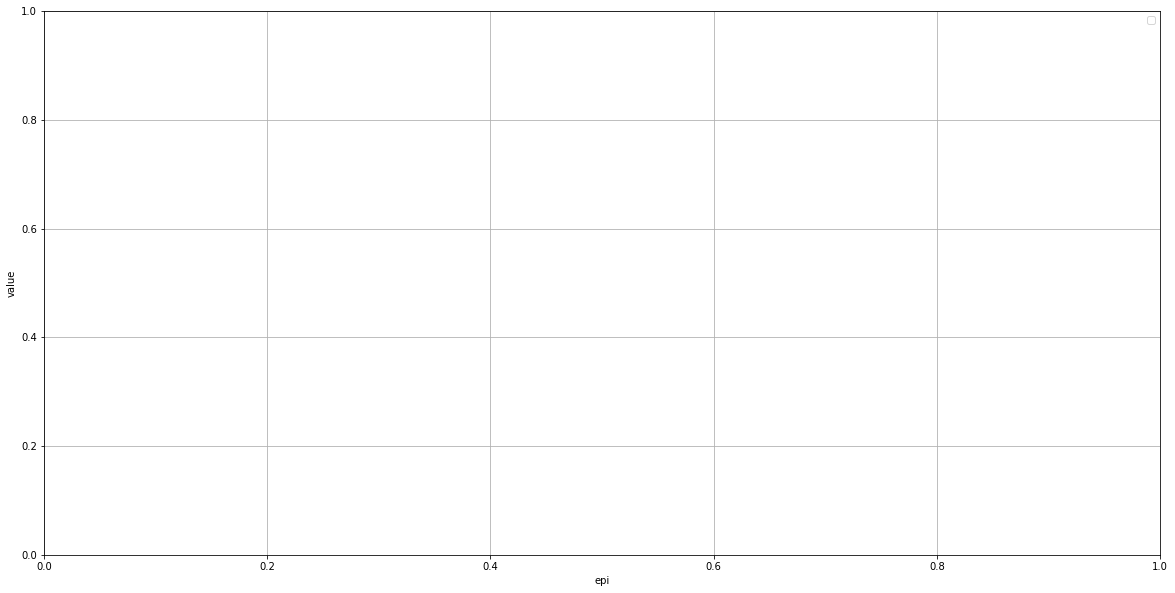

In [30]:
fig = plt.figure(figsize=(20, 10))
colors = random_colors(len(exp_list), bright=False)
legends =[]
for i, exp in enumerate(exp_list):
    legends.append(exp)
    with open(os.path.join('results', exp, 'log.txt'), 'r') as f:
        lines = f.readlines()
    steps, tr_loss, tr_acc, te_loss, te_acc = [], [], [], [], []

    for line in lines:
        try:
            line = line.replace('\n','')
            line_split = line.split(' ')
            if len(line_split) == 5:
                [s, tr_ls, tr_ac, te_ls, te_ac] = line_split
                print(s)
                steps.append(float(s))
                tr_loss.append(float(tr_ls))
                tr_acc.append(float(tr_ac))
                te_loss.append(float(te_ls))
                te_acc.append(float(te_ac))
        except:
            pass
    break
    if ytype == 'acc':
        views = {'train':tr_acc, 'test':te_acc}
    elif ytype == 'loss':
        views = {'train':tr_loss, 'test':te_loss}
    view = views[plot_type]
    if len(steps) != len(view):
        continue

    plt.plot(steps, view, '-+', color=colors[i])
    # acc -> True
    flag = (view[0] - view[-1]) < 0
    if flag:
        m_index = np.argmax(view)
        plt.annotate('{:.5f}'.format(np.max(view)), 
                     xy=(steps[m_index], view[m_index]-0.05), color=colors[i])
    else:
        m_index = np.argmin(view)
        plt.annotate('{:.5f}'.format(np.min(view)), 
                     xy=(steps[m_index], view[m_index]+0.05), color=colors[i])
    print('{}: {:.5f}'.format(exp, view[m_index]))

plt.legend(legends)
plt.grid()
# plt.ylim([0.4, 1])
# plt.yticks(np.arange(0.4,1,0.1))
plt.xlabel('epi')
plt.ylabel('value')
# plt.xlim([0,50000])
plt.show()

In [31]:
steps

[100.0,
 200.0,
 300.0,
 400.0,
 500.0,
 600.0,
 800.0,
 900.0,
 1000.0,
 1100.0,
 1200.0,
 1300.0,
 1400.0,
 1600.0,
 2000.0,
 2700.0,
 2800.0,
 3100.0,
 3200.0,
 3300.0,
 3400.0,
 3600.0,
 3700.0,
 4000.0,
 4300.0,
 4500.0,
 4800.0,
 4900.0,
 5000.0,
 5500.0,
 5700.0,
 5800.0,
 5900.0,
 7200.0,
 7300.0,
 7400.0,
 7500.0,
 7700.0,
 8100.0,
 8300.0,
 8800.0,
 9000.0,
 9100.0,
 9500.0,
 9600.0,
 9800.0,
 9900.0,
 10100.0,
 10300.0,
 10500.0,
 10600.0,
 10700.0,
 11000.0,
 11100.0,
 11200.0,
 11300.0,
 11500.0,
 16100.0,
 16300.0,
 16400.0,
 16600.0,
 16800.0,
 17000.0,
 18000.0,
 18300.0,
 18400.0,
 18500.0,
 18600.0,
 19000.0,
 19600.0,
 20100.0,
 20300.0,
 20400.0,
 22400.0,
 23000.0,
 23100.0,
 23300.0,
 23400.0,
 30000.0,
 30100.0,
 30200.0,
 30400.0,
 30500.0,
 30800.0,
 30900.0,
 33200.0,
 33300.0,
 33400.0,
 34300.0,
 36400.0,
 36500.0,
 38200.0,
 39400.0,
 40100.0,
 50100.0,
 60100.0,
 62700.0,
 70100.0,
 73500.0,
 75600.0,
 80100.0,
 86200.0,
 90000.0,
 90100.0,
 91000.0,
 9810

In [16]:
len(steps)

177

In [17]:
len(tr_loss)

177